# Simulating one planet, and verifying Kepler's laws
Here we put down a single planet, and show using numerical simulations that Kepler's laws (which are analytic expressions) can be reproduced.

In [1]:
# we need some python modules to get everything to work properly
import rebound # the simulator
import numpy as np # handy module for vectors
import matplotlib.pyplot as plt # for plotting

# include this to make plotting in a Jupyter notebook interactive
# it's not necessary, but looks nicer
# %matplotlib notebook

## Basic setup
First, we create a simulation "object", specify the units we will use, and add the Sun and the Earth. Since the Sun's mass is $2 \times 10^{30}$kg, and the Earth's $6 \times 10^{24}$kg, we could safely assume the Earth's mass to be zero and the simulation would look the same. With many bodies in the simulation this would make the integration much faster, as the forces between bodies with zero mass don't need to be calculated.

In [2]:
# get a simulation object and specify units
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'kg')

# set the initial time
sim.t = 0.0

# add a Solar mass star, at xyz=0, vxyz=0
msun = 1.989e30
sim.add(m = msun, x=0, y=0, z=0, vx=0, vy=0 ,vz=0)

# add a particle on Earth's orbit, the velocity is 2.pi AU/year,
# as the Earth's orbit is a circle with radius 1AU, and it takes
# one year to complete an orbit (and we said that the units will
# be AU and years above).
v_circ = 2*np.pi
# first make a particle object
p = rebound.Particle(simulation=sim,
                     m=0.0, # does it matter what mass we assume for the Earth here?
                     x=1, y=0, z=0,
                     vx=0, vy=v_circ, vz=0)
# then add it to the simulaton
sim.add(p)

# move the origin to the center of mass and momentum.
# it doesn't matter here since Earth has no (or very little) mass,
# but in other cases if we didn't the c.o.m of the system would move!
sim.move_to_com()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10aef8d30>)

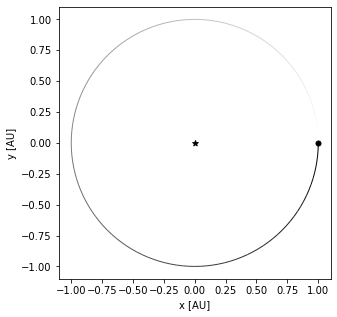

In [3]:
# plot the location of Earth, and show a trace for the orbital path
# this will show the current status of the simulation, which is t=0
rebound.OrbitPlot(sim, orbit_type='trail',
                  xlim=(-1.1,1.1), ylim=(-1.1,1.1), unitlabel='[AU]')

In [4]:
# now "integrate" the simulation forward in time, units are years
sim.integrate(tmax=0.5)

In [5]:
# verify that the simulation is now at the time put in above
sim.t

0.5

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10cff9630>)

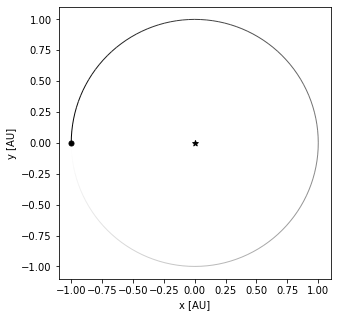

In [6]:
# now make the plot again, for the updated time
# unless you put in a multiple of 1 years, it should have moved
rebound.OrbitPlot(sim, xlim=(-1.1,1.1), ylim=(-1.1,1.1), unitlabel='[AU]')

### Earth's mass and centering the simulation
Now go back and change the Earth's mass, to the real value, and to a large value (e.g. a Solar mass). Try including and excluding the move_to_com command.
- Does these changes make any difference? Could we assume the Earth's mass is zero?
- What does the initial orbit look like for a high mass? Why is it different than for a low mass for the Earth?
- How does the centering command change what happens to the simulation after integrating for a short period?

## Neptune
Now we instead simulate Neptune, which orbits with a semi-major axis of 30AU, and has an eccentricity $e$ so close to zero that we will assume that it is actually zero (i.e. $e=0$).

Kepler's second law is $P^2 \propto a^3$, where $P$ is the orbital period and $a$ the semi-major axis of the orbit (and radius $r$ of a circular orbit). We need to know what velocity to give Neptune, which we can work out from $v=\Omega r$ and $\Omega = 2 \pi / P$. Combining these gives $v \propto 1/\sqrt{a}$, so we can just scale down the Earth's velocity by this factor.

We can check that we got this right by seeing if the orbit of Neptune comes out as a circle, try putting in a different velocity and see what happens in the initial orbit plot.

In [7]:
# overwrite the simulation object with a fresh one
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'kg')

# set the initial time
sim.t = 0.0

# add a Solar mass star, this is at xyz=0, vxyz=0 by default
msun = 1.989e30
sim.add(m = msun)

# now add Neptune, at 30AU the velocity is 1/sqrt(30) times slower
a_Neptune = 30.0
v_circ = 2*np.pi / np.sqrt(a_Neptune)
p = rebound.Particle(simulation=sim,
                     m=1e26,
                     x=a_Neptune, y=0, z=0,
                     vx=0, vy=v_circ, vz=0)
sim.add(p)

# do this for completeness, doesn't matter here since Earth has no mass
# if we didn't the c.o.m of the system would move!
sim.move_to_com()

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10d18e908>)

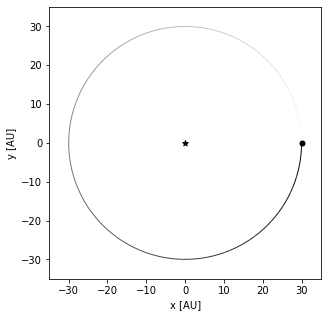

In [8]:
# plot to see it was added correctly
rebound.OrbitPlot(sim, orbit_type='trail',
                  xlim=(-35,35), ylim=(-35,35), unitlabel='[AU]')

### Kepler's second law
As noted above, Kepler's second law says that the orbital period of a planet is proportional to the semi-major axis to the power of 3/2, so one orbit of Neptune takes 30^1.5 years. We can verify this by trying to simulate just a single orbit of Neptune.

In [9]:
# calculate the orbital period of Neptune,
# and integrate the simulation up to this point
t_orb = 30**1.5
sim.integrate(tmax=t_orb)

(<Figure size 360x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10d291898>)

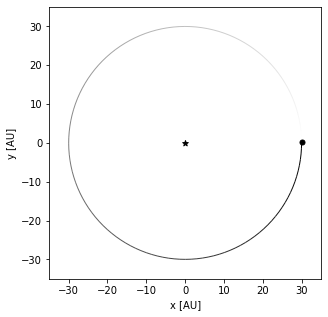

In [10]:
# has the planet completed one orbit?
rebound.OrbitPlot(sim, orbit_type='trail',
                  xlim=(-35,35), ylim=(-35,35), unitlabel='[AU]')

### Plotting quantities over time
How do we know Neptune completed just one orbit, or moved at all? To check we can plot the location of the planet at a series of times throughout this orbit, and see if the results make sense.

In [11]:
# create a linearly spaced series of time steps where we want data
times = np.linspace(0, t_orb, 50)

# make some empty arrays where we'll put the data
# in this case just the x,y coordinates
x = []
y = []

# now loop over the times and append the x,y values 
# to the arrays at each step
for t in times:
    sim.integrate(tmax=t)
    x.append(sim.particles[1].x)
    y.append(sim.particles[1].y)

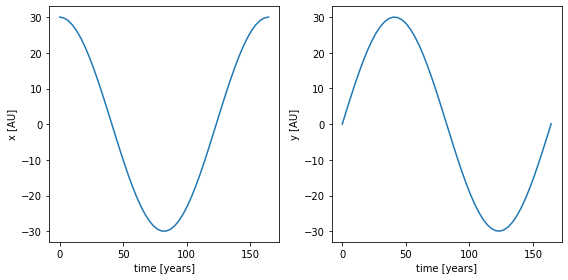

In [12]:
# plot x and y against time, to verify that one orbit was completed
fig, ax = plt.subplots(1,2, figsize=(8,4))
ax[0].plot(times, x)
ax[1].plot(times, y)
ax[0].set_xlabel('time [years]')
ax[0].set_ylabel('x [AU]')
ax[1].set_xlabel('time [years]')
ax[1].set_ylabel('y [AU]')
fig.tight_layout()

### Animation
Since we have data over time, let's try animating the motion. The results are not particularly suprising here, but movies can be a helpful way to analyse data.

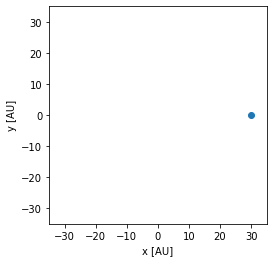

In [13]:
import matplotlib.animation as animation
fig, ax = plt.subplots()
dot = ax.plot(x[0], y[0], 'o')[0]
ax.set_aspect('equal')
ax.set_xlim(-35,35)
ax.set_ylim(-35,35)
ax.set_xlabel('x [AU]')
ax.set_ylabel('y [AU]')

def animate(i):
    dot.set_xdata(x[i])  # update the data.
    dot.set_ydata(y[i])
    return dot

ani = animation.FuncAnimation(fig, animate, frames=len(x))
ani.save('earth.mp4')

## Pluto and Kepler's third law
Kepler's third law states that a planet sweeps out equal area in equal time, meaning that a triangle made up by the planet start and end points and the star over some portion time always has the same area. This is trivially true for a cirular orbit since the triangle for every equal portion of the orbit looks exactly the same. It's less ovbious for a planet on an eccentric (elliptical) orbit, so now we'll use Pluto (which has e=0.2488).

This last bit is just stating Kepler's first law, which is that orbits are ellipses with the Sun at one focus, which we can verify below.

In [14]:
# overwrite the simulation object with a fresh one
sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'kg')

# set the initial time
sim.t = 0.0

# add a Solar mass star, this will be at xyz=0, vxyz=0
msun = 1.989e30
sim.add(m = msun)

# now add Pluto, for simplicity we can do this with orbital elements
# where a is the semi-major axis and e the eccentricity
# this method figures out the planet velocity for us
a_Pluto = 39.482
e_Pluto = 0.2488
p = rebound.Particle(simulation=sim,
                     m=1.3e22,
                     a=a_Pluto, e=e_Pluto)
sim.add(p)

# do this for completeness
sim.move_to_com()

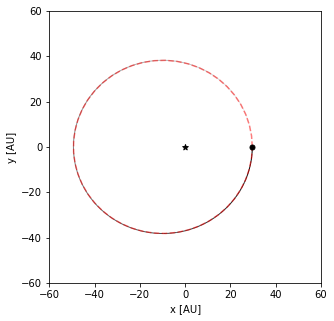

In [15]:
# plot to see it was added correctly,
# now the orbit is an ellipse with the star at one foci
# (i.e. Kepler's first law)
fig, ax = rebound.OrbitPlot(sim, orbit_type='trail',
                            xlim=(-60,60), ylim=(-60,60), unitlabel='[AU]')

# overplot an ellipse to check Kepler's first law
f = np.linspace(0,2*np.pi,50)
b_Pluto = np.sqrt( a_Pluto**2 * (1 - e_Pluto**2) )
c_Pluto = np.sqrt(a_Pluto**2 - b_Pluto**2)
ax.plot(a_Pluto*np.cos(f)-c_Pluto, b_Pluto*np.sin(f), '--', color='red', alpha=0.5)

In [16]:
# create a linearly spaced series of time steps over one orbit 
# and record the x,y positions
t_orb = a_Pluto**1.5
nstep = 50
times = np.linspace(0, t_orb, nstep)

# make some empty arrays where we'll put the data
x = []
y = []

# now loop over the times and append the x,y values 
# to the arrays at each step
for t in times:
    sim.integrate(tmax=t)
    x.append(sim.particles[1].x)
    y.append(sim.particles[1].y)

### Kepler's third law
Now compute the area swept in each time step by computing the area of a triangle defined by the Sun and the points at the start and end of each time step.

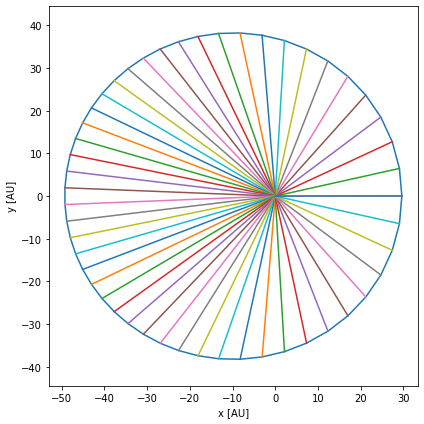

In [17]:
# illustrate the triangles
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(x, y)

for i in range(nstep):
    ax.plot([0,x[i]],[0,y[i]])
# neater way of doing the same thing
# for x1,y1 in zip(x,y):
#     ax.plot([0,x1],[0,y1])

ax.set_xlabel('x [AU]')
ax.set_ylabel('y [AU]')
ax.axis('equal')
fig.tight_layout()

In [18]:
# area of a traingle is 1/2.base.height, so if we set the
# distance to one of the points as a (the base), and the
# distance to the other as b, then the height is b.sin(C),
# where C is the angle at the origin, and the area is
# 1/2.a.b.sin(C)
# make a wee function to compute that
def triangle_area(x1,y1,x2,y2):
    '''Return area of a triangle given two vertices, third is at origin.
    Use complex numbers to compute the angles and lengths.'''
    vec1 = np.complex(x1,y1)
    vec2 = np.complex(x2,y2)
    angle = np.abs(np.angle(vec1) - np.angle(vec2))
    # account for cases where it should have been 2-1
    if angle > np.pi:
        angle = 2*np.pi - angle
    return 0.5 * np.abs(vec1) * np.abs(vec2) * np.sin(angle)

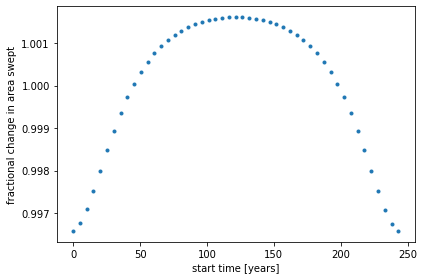

In [19]:
# check that areas are constant for each time step
area = []
for i in range(nstep-1):
    area.append( triangle_area(x[i], y[i], x[i+1], y[i+1]) )
    
fig, ax = plt.subplots()
ax.plot(times[:-1], area / np.mean(area), '.')
ax.set_xlabel('start time [years]')
ax.set_ylabel('fractional change in area swept')
fig.tight_layout()

### Accuracy of area calculation
Is the accuracy of the above calcuation any good? Does it really verify Kepler's third law?
- Go back and change the number of steps, and see how the result changes. Why?